___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!


Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc
#from scikit_plot.metrics import plot_roc, plot_precision_recall
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import tensorflow as tf


In [ ]:
import os
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Data Wrangling

In [ ]:
reviewsDataSet = pd.read_csv('https://drive.google.com/uc?id=16lNwIzUz3yaYkGcw_WLxkYIcInjAiaEM')
reviewsDataSet.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
reviewsDataSet.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
reviewsDataSet.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [ ]:
reviewsDataSet.sample(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
10045,10045,1037,22,Must have but....,Absolutely love these pants! i have had these ...,3,1,1,General,Bottoms,Jeans
12962,12962,829,51,NaN,Beautiful blouse - the material is great. long...,5,1,0,General Petite,Tops,Blouses
18390,18390,850,37,Lovely drape in your regular size,I originally purchased this in my usual retail...,4,1,15,General,Tops,Blouses
13838,13838,1078,41,NaN,NaN,3,1,0,General,Dresses,Dresses
15261,15261,1083,45,Beautiful and unique,I wore this dress to my work christmas party a...,5,1,0,General Petite,Dresses,Dresses


In [ ]:
reviewsDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
reviewsDataSet.shape

(23486, 11)

In [ ]:
reviewsDataSet.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [ ]:
reviewsDataSet['Review Text'].sample(1)

12613    My daughter loves these, she wears them around...
Name: Review Text, dtype: object

In [ ]:
reviewsDataSet.duplicated().sum()

0

In [ ]:
reviewsDataSet['Review Text'].isnull().sum()

845

In [ ]:
reviewsDataSet = reviewsDataSet.dropna(axis=0,  how = 'all', subset=['Review Text'])

In [ ]:
reviewsDataSet['Review Text'].isnull().sum()

0

In [ ]:
reviewsDataSet['Recommended type'] = reviewsDataSet['Recommended IND'].map({0:'Negative' , 1: 'Positive'})

In [ ]:
reviewsDataSet.sample(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended type
11732,11732,960,69,NaN,Love the fabric. comfortable to wear with jean...,5,1,4,General,Jackets,Jackets,Positive
22161,22161,862,25,Runs big,I think the shirt is supposed to be a relaxed ...,4,1,0,General,Tops,Knits,Positive
20711,20711,945,64,Love but itchy for me,Adorable & unique swtr & wld go w/ many things...,5,1,0,General,Tops,Sweaters,Positive
332,332,866,46,Really good quality tee!,I love this tee! the material is thick but not...,5,1,5,General,Tops,Knits,Positive
6482,6482,150,56,This product adds volume.,This jacket is very cozy but i had to send it ...,3,1,0,Initmates,Intimate,Sleep,Positive


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [ ]:
reviewsDataSet['Recommended type'].value_counts()

Positive    18540
Negative     4101
Name: Recommended type, dtype: int64

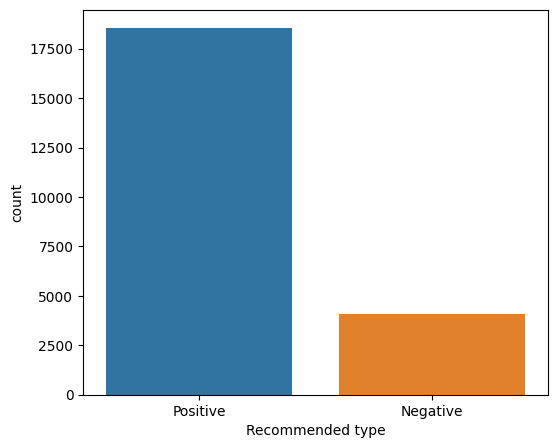

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='Recommended type',data=reviewsDataSet);

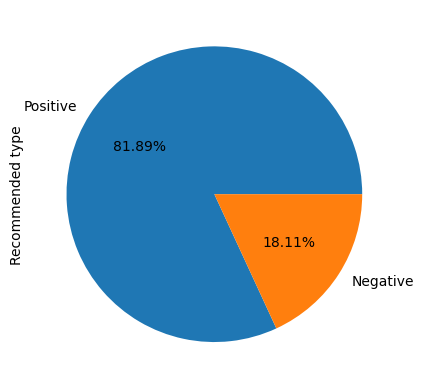

In [ ]:
reviewsDataSet['Recommended type'].value_counts().plot.pie(autopct = '%.2f%%');

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [ ]:
reviewsDataSettemp = reviewsDataSet.copy()

In [ ]:
reviewsDataSettemp['count'] = reviewsDataSettemp['Review Text'].apply(lambda x: len(x.split(' ')))
reviewsDataSettemp['count'].min()

2

In [ ]:
englishStopWords = stopwords.words("english")
englishStopWords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
reviewsDataSettemp.rename(columns={'Recommended IND': 'recommendedClass'}, inplace=True)

In [ ]:
reviewsDataSettemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22641 non-null  int64 
 1   Clothing ID              22641 non-null  int64 
 2   Age                      22641 non-null  int64 
 3   Title                    19675 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   22641 non-null  int64 
 6   recommendedClass         22641 non-null  int64 
 7   Positive Feedback Count  22641 non-null  int64 
 8   Division Name            22628 non-null  object
 9   Department Name          22628 non-null  object
 10  Class Name               22628 non-null  object
 11  Recommended type         22641 non-null  object
 12  count                    22641 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 2.4+ MB


In [ ]:
def cleanText(Text):
    Text = Text.replace("'", "")
    Text = word_tokenize(Text.lower())
    Text = [w for w in Text if w.isalpha()]
    Text = [t for t in Text if t not in englishStopWords]

    #lemma
    Text = [WordNetLemmatizer().lemmatize(t) for t in Text]


    #joining
    return " ".join( Text)

In [ ]:
reviewsDataSetCleanTemp = reviewsDataSettemp.copy()

In [ ]:
reviewsDataSetCleanTemp['clean Review'] = reviewsDataSetCleanTemp['Review Text'].apply(cleanText)

In [ ]:
reviewsDataSetCleanTemp.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'recommendedClass', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Recommended type', 'count',
       'clean Review'],
      dtype='object')

In [ ]:
reviewsDataSetCleanTemp = reviewsDataSetCleanTemp[['clean Review', 'recommendedClass', 'Recommended type']]

In [ ]:
reviewsDataSetCleanTemp.columns

Index(['clean Review', 'recommendedClass', 'Recommended type'], dtype='object')

In [ ]:
reviewsDataSetCleanTemp.sample(3)

,clean Review,recommendedClass,Recommended type
20235,tried several time yet pull trigger like coral...,1,Positive
12522,cute shirt tee neath look better shirt underne...,1,Positive
3361,love tee drapery cut love thing found ran bit ...,1,Positive


---
---


### Missing Value Detection

In [ ]:
reviewsDataSetCleanTemp.isnull().sum()

clean Review        0
recommendedClass    0
Recommended type    0
dtype: int64

In [ ]:
reviewsDataSetCleanTemp.duplicated().sum()

10

In [ ]:
reviewsDataSetCleanTemp.drop_duplicates(inplace = True)

In [ ]:
reviewsDataSetCleanTemp.duplicated().sum()

0

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [ ]:
postiveReviews = reviewsDataSetCleanTemp[reviewsDataSetCleanTemp['Recommended type'] == 'Positive']['clean Review']
postiveReviews = postiveReviews.apply(cleanText)

In [ ]:
negativeReviews = reviewsDataSetCleanTemp[reviewsDataSetCleanTemp['Recommended type'] == 'Negative']['clean Review']
negativeReviews = negativeReviews.apply(cleanText)

### Collect Words (positive and negative separately)

In [ ]:
postiveCollection = " ".join(postiveReviews)

In [ ]:
negativeCollection = " ".join(negativeReviews)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

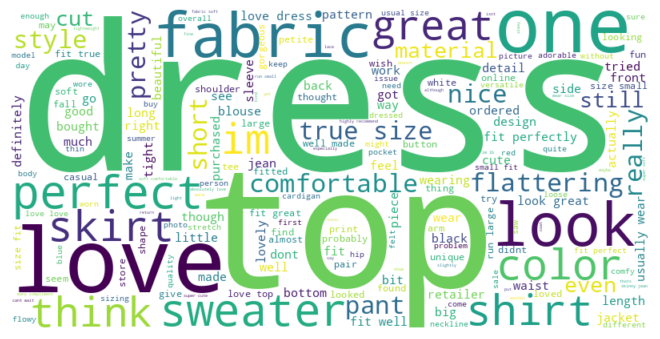

In [ ]:
from wordcloud import WordCloud
plt.axis("off")
wordcloud_p = WordCloud( background_color="white", width=800, height=400).generate(postiveCollection)
plt.tight_layout(pad=0)
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.show()

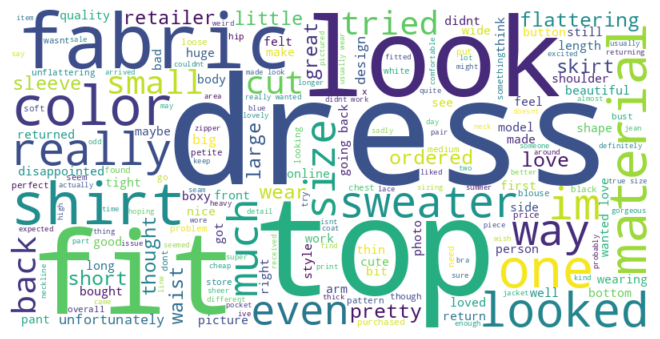

In [ ]:
plt.axis("off")
wordcloud_p = WordCloud( background_color="white", width=800, height=400).generate(negativeCollection)
plt.tight_layout(pad=0)
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
X = reviewsDataSetCleanTemp['clean Review']
y = reviewsDataSetCleanTemp['recommendedClass']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleanText, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
df_train_count_vic = pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out(),
                              index= X_train.index)
df_test_count_vic = pd.DataFrame(X_test_count.toarray(), columns = vectorizer.get_feature_names_out(),
                              index= X_test.index)

### TF-IDF

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out(),
                              index= X_train.index)
df_test_tfidf = pd.DataFrame(X_test_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out(),
                              index= X_test.index)

### Eval Function

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("train Set eval")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print('------------------------------------------------------')
    print("test Set eval")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [ ]:
def eval_metricBL(model, X_train, y_train, X_test, y_test):

    y_train_pred = model.predict(X_train) > 0.5
    y_pred = model.predict(X_test) > 0.5
    print("train Set eval")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print('------------------------------------------------------')
    print("test Set eval")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [ ]:
def eval_scores(model, X_train, y_train):
    scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average=None, labels=[0]),
            'recall': make_scorer(recall_score, average=None, labels = [0]),
            'f1': make_scorer(f1_score, average=None, labels = [0])}
    scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True, n_jobs = -1)
    return pd.DataFrame(scores, index = range(1,6))

In [ ]:
def eval_scores_dl(y_true, y_pred):
  precision_s = average_precision_score(y_true, y_pred)
  recall_s = recall_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))
  f1_s = f1_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))
  return pd.DataFrame({'f-1':[f1_s], 'precision':[precision_s], 'recall':[recall_s]})

## Logistic Regression

### CountVectorizer

In [ ]:
logisitc_model = LogisticRegression(max_iter = 10000)
logisitc_model.fit(X_train_count, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
eval_metric(logisitc_model, X_train_count, y_train, X_test_count, y_test)

train Set eval
[[ 2571   709]
 [  298 14526]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      3280
           1       0.95      0.98      0.97     14824

    accuracy                           0.94     18104
   macro avg       0.92      0.88      0.90     18104
weighted avg       0.94      0.94      0.94     18104

------------------------------------------------------
test Set eval
[[ 513  307]
 [ 202 3505]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       820
           1       0.92      0.95      0.93      3707

    accuracy                           0.89      4527
   macro avg       0.82      0.79      0.80      4527
weighted avg       0.88      0.89      0.88      4527



In [ ]:
eval_scores(logisitc_model, X_train_count, y_train).mean()[2:]

test_accuracy      0.883783
train_accuracy     0.948603
test_precision     0.709473
train_precision    0.905662
test_recall        0.607317
train_recall       0.799619
test_f1            0.654223
train_f1           0.849324
dtype: float64

### TF-IDF

In [ ]:
logisitc_model_tf = LogisticRegression(max_iter = 10000)
logisitc_model_tf.fit(X_train_tf_idf, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
eval_metric(logisitc_model_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

train Set eval
[[ 1970  1310]
 [  327 14497]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71      3280
           1       0.92      0.98      0.95     14824

    accuracy                           0.91     18104
   macro avg       0.89      0.79      0.83     18104
weighted avg       0.91      0.91      0.90     18104

------------------------------------------------------
test Set eval
[[ 443  377]
 [ 115 3592]]
              precision    recall  f1-score   support

           0       0.79      0.54      0.64       820
           1       0.91      0.97      0.94      3707

    accuracy                           0.89      4527
   macro avg       0.85      0.75      0.79      4527
weighted avg       0.88      0.89      0.88      4527



In [ ]:
eval_scores(logisitc_model_tf, X_train_tf_idf, y_train).mean()[2:]

test_accuracy      0.886268
train_accuracy     0.908915
test_precision     0.796832
train_precision    0.867916
test_recall        0.499695
train_recall       0.586509
test_f1            0.614103
train_f1           0.699982
dtype: float64

## Naive Bayes

### Countvectorizer

In [ ]:
nbModel= BernoulliNB()
nbModel.fit(X_train_count, y_train)

BernoulliNB()

In [ ]:
eval_metric(nbModel, X_train_count, y_train, X_test_count, y_test)

train Set eval
[[ 2622   658]
 [ 1174 13650]]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      3280
           1       0.95      0.92      0.94     14824

    accuracy                           0.90     18104
   macro avg       0.82      0.86      0.84     18104
weighted avg       0.91      0.90      0.90     18104

------------------------------------------------------
test Set eval
[[ 588  232]
 [ 339 3368]]
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       820
           1       0.94      0.91      0.92      3707

    accuracy                           0.87      4527
   macro avg       0.78      0.81      0.80      4527
weighted avg       0.88      0.87      0.88      4527



In [ ]:
eval_scores(nbModel, X_train_count, y_train).mean()[2:]

test_accuracy      0.877265
train_accuracy     0.901596
test_precision     0.642721
train_precision    0.701930
test_recall        0.727134
train_recall       0.794055
test_f1            0.682225
train_f1           0.745151
dtype: float64

### TF-IDF

In [ ]:
nbModelTF = BernoulliNB()
nbModelTF.fit(X_train_tf_idf, y_train)

BernoulliNB()

In [ ]:
eval_metric(nbModelTF, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

train Set eval
[[ 2386   894]
 [  854 13970]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      3280
           1       0.94      0.94      0.94     14824

    accuracy                           0.90     18104
   macro avg       0.84      0.83      0.84     18104
weighted avg       0.90      0.90      0.90     18104

------------------------------------------------------
test Set eval
[[ 503  317]
 [ 258 3449]]
              precision    recall  f1-score   support

           0       0.66      0.61      0.64       820
           1       0.92      0.93      0.92      3707

    accuracy                           0.87      4527
   macro avg       0.79      0.77      0.78      4527
weighted avg       0.87      0.87      0.87      4527



In [ ]:
eval_scores(nbModelTF, X_train_tf_idf, y_train).mean()[2:]

test_accuracy      0.873343
train_accuracy     0.905366
test_precision     0.665782
train_precision    0.760890
test_recall        0.607317
train_recall       0.696570
test_f1            0.634895
train_f1           0.727308
dtype: float64

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
svmModel = SVC()
svmModel.fit(X_train_count, y_train)

SVC()

In [ ]:
eval_metric(svmModel, X_train_count, y_train, X_test_count, y_test)

train Set eval
[[ 2764   516]
 [  108 14716]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3280
           1       0.97      0.99      0.98     14824

    accuracy                           0.97     18104
   macro avg       0.96      0.92      0.94     18104
weighted avg       0.97      0.97      0.96     18104

------------------------------------------------------
test Set eval
[[ 440  380]
 [ 110 3597]]
              precision    recall  f1-score   support

           0       0.80      0.54      0.64       820
           1       0.90      0.97      0.94      3707

    accuracy                           0.89      4527
   macro avg       0.85      0.75      0.79      4527
weighted avg       0.89      0.89      0.88      4527



In [ ]:
eval_scores(svmModel, X_train_count, y_train).mean()[2:]

test_accuracy      0.885992
train_accuracy     0.965947
test_precision     0.803651
train_precision    0.965979
test_recall        0.490549
train_recall       0.841692
test_f1            0.609016
train_f1           0.899560
dtype: float64

### TD-IDF

In [ ]:
svmModelTF = SVC()
svmModelTF.fit(X_train_tf_idf, y_train)

SVC()

In [ ]:
eval_metric(svmModelTF, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

train Set eval
[[ 2954   326]
 [   54 14770]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3280
           1       0.98      1.00      0.99     14824

    accuracy                           0.98     18104
   macro avg       0.98      0.95      0.96     18104
weighted avg       0.98      0.98      0.98     18104

------------------------------------------------------
test Set eval
[[ 447  373]
 [ 115 3592]]
              precision    recall  f1-score   support

           0       0.80      0.55      0.65       820
           1       0.91      0.97      0.94      3707

    accuracy                           0.89      4527
   macro avg       0.85      0.76      0.79      4527
weighted avg       0.89      0.89      0.88      4527



In [ ]:
eval_scores(svmModelTF, X_train_tf_idf, y_train).mean()[2:]

test_accuracy      0.887538
train_accuracy     0.979549
test_precision     0.797604
train_precision    0.984757
test_recall        0.508232
train_recall       0.901067
test_f1            0.620661
train_f1           0.941054
dtype: float64

## Random Forest

### Countvectorizer

In [ ]:
RandomForestModel = RandomForestClassifier()
RandomForestModel.fit(X_train_count, y_train)

RandomForestClassifier()

In [ ]:
eval_metric(RandomForestModel, X_train_count, y_train, X_test_count, y_test)

train Set eval
[[ 3279     1]
 [    0 14824]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3280
           1       1.00      1.00      1.00     14824

    accuracy                           1.00     18104
   macro avg       1.00      1.00      1.00     18104
weighted avg       1.00      1.00      1.00     18104

------------------------------------------------------
test Set eval
[[ 229  591]
 [  57 3650]]
              precision    recall  f1-score   support

           0       0.80      0.28      0.41       820
           1       0.86      0.98      0.92      3707

    accuracy                           0.86      4527
   macro avg       0.83      0.63      0.67      4527
weighted avg       0.85      0.86      0.83      4527



In [ ]:
eval_scores(RandomForestModel, X_train_count, y_train).mean()[2:]

test_accuracy      0.858760
train_accuracy     1.000000
test_precision     0.843342
train_precision    1.000000
test_recall        0.271037
train_recall       1.000000
test_f1            0.409857
train_f1           1.000000
dtype: float64

### TF-IDF

In [ ]:
RandomForestModelTF = RandomForestClassifier()
RandomForestModelTF.fit(X_train_tf_idf, y_train)

RandomForestClassifier()

In [ ]:
eval_metric(RandomForestModelTF, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

train Set eval
[[ 3280     0]
 [    0 14824]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3280
           1       1.00      1.00      1.00     14824

    accuracy                           1.00     18104
   macro avg       1.00      1.00      1.00     18104
weighted avg       1.00      1.00      1.00     18104

------------------------------------------------------
test Set eval
[[ 173  647]
 [  23 3684]]
              precision    recall  f1-score   support

           0       0.88      0.21      0.34       820
           1       0.85      0.99      0.92      3707

    accuracy                           0.85      4527
   macro avg       0.87      0.60      0.63      4527
weighted avg       0.86      0.85      0.81      4527



In [ ]:
eval_scores(RandomForestModelTF, X_train_tf_idf, y_train).mean()[2:]

test_accuracy      0.849149
train_accuracy     1.000000
test_precision     0.873897
train_precision    1.000000
test_recall        0.195732
train_recall       1.000000
test_f1            0.319646
train_f1           1.000000
dtype: float64

## Ada Boosting

### Countvectorizer

In [ ]:
AdaBoosting = AdaBoostClassifier()
AdaBoosting.fit(X_train_count, y_train)

AdaBoostClassifier()

In [ ]:
eval_metric(AdaBoosting, X_train_count, y_train, X_test_count, y_test)

train Set eval
[[ 1480  1800]
 [  671 14153]]
              precision    recall  f1-score   support

           0       0.69      0.45      0.55      3280
           1       0.89      0.95      0.92     14824

    accuracy                           0.86     18104
   macro avg       0.79      0.70      0.73     18104
weighted avg       0.85      0.86      0.85     18104

------------------------------------------------------
test Set eval
[[ 378  442]
 [ 175 3532]]
              precision    recall  f1-score   support

           0       0.68      0.46      0.55       820
           1       0.89      0.95      0.92      3707

    accuracy                           0.86      4527
   macro avg       0.79      0.71      0.74      4527
weighted avg       0.85      0.86      0.85      4527



In [156]:
eval_scores(AdaBoosting, X_train_count, y_train).mean()[2:]

test_accuracy      0.862627
train_accuracy     0.863552
test_precision     0.684045
train_precision    0.687146
test_recall        0.449390
train_recall       0.453201
test_f1            0.542345
train_f1           0.546163
dtype: float64

### TF-IDF

In [ ]:
AdaBoostingTF = AdaBoostClassifier()
AdaBoostingTF.fit(X_train_tf_idf, y_train)

AdaBoostClassifier()

In [ ]:
eval_metric(AdaBoostingTF, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

train Set eval
[[ 1519  1761]
 [  706 14118]]
              precision    recall  f1-score   support

           0       0.68      0.46      0.55      3280
           1       0.89      0.95      0.92     14824

    accuracy                           0.86     18104
   macro avg       0.79      0.71      0.74     18104
weighted avg       0.85      0.86      0.85     18104

------------------------------------------------------
test Set eval
[[ 374  446]
 [ 188 3519]]
              precision    recall  f1-score   support

           0       0.67      0.46      0.54       820
           1       0.89      0.95      0.92      3707

    accuracy                           0.86      4527
   macro avg       0.78      0.70      0.73      4527
weighted avg       0.85      0.86      0.85      4527



In [ ]:
eval_scores(AdaBoostingTF, X_train_tf_idf, y_train).mean()[2:]

test_accuracy      0.858098
train_accuracy     0.865196
test_precision     0.661674
train_precision    0.688149
test_recall        0.443598
train_recall       0.468064
test_f1            0.531034
train_f1           0.557134
dtype: float64

## DL modeling

In [ ]:
XDL = reviewsDataSetCleanTemp['clean Review']
YDL = reviewsDataSetCleanTemp['recommendedClass']

### Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
tokenizer = Tokenizer(num_words=reviewsDataSettemp['count'].sum())

In [ ]:
tokenizer.fit_on_texts(XDL)

### Creating word index

In [ ]:
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'size': 3,
 'love': 4,
 'top': 5,
 'like': 6,
 'color': 7,
 'look': 8,
 'wear': 9,
 'great': 10,
 'im': 11,
 'would': 12,
 'fabric': 13,
 'small': 14,
 'really': 15,
 'ordered': 16,
 'little': 17,
 'perfect': 18,
 'one': 19,
 'flattering': 20,
 'soft': 21,
 'well': 22,
 'back': 23,
 'comfortable': 24,
 'cute': 25,
 'nice': 26,
 'bought': 27,
 'beautiful': 28,
 'bit': 29,
 'material': 30,
 'large': 31,
 'shirt': 32,
 'much': 33,
 'sweater': 34,
 'length': 35,
 'run': 36,
 'jean': 37,
 'also': 38,
 'work': 39,
 'petite': 40,
 'got': 41,
 'long': 42,
 'short': 43,
 'waist': 44,
 'quality': 45,
 'medium': 46,
 'skirt': 47,
 'think': 48,
 'pretty': 49,
 'even': 50,
 'retailer': 51,
 'x': 52,
 'make': 53,
 'feel': 54,
 'tried': 55,
 'pant': 56,
 'store': 57,
 'usually': 58,
 'get': 59,
 'way': 60,
 'sleeve': 61,
 'good': 62,
 'could': 63,
 'big': 64,
 'made': 65,
 'cut': 66,
 'go': 67,
 'dont': 68,
 'didnt': 69,
 'still': 70,
 'style': 71,
 'right': 72,
 'black': 73,

### Converting tokens to numeric

In [ ]:
XNumTokens = tokenizer.texts_to_sequences(XDL)

### Maximum number of tokens for all documents¶

In [ ]:
numTokens = np.array([len(sen_tokens) for sen_tokens in XNumTokens])

In [ ]:
numTokens.max()

58

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(XNumTokens, maxlen = numTokens.max())

In [ ]:
X_pad.shape

(22631, 58)

### Train Set Split

In [ ]:
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_pad, YDL, test_size=0.2,stratify=YDL, random_state=42)

In [ ]:
X_train_vdl, X_val_dl, y_train_vdl, y_val_dl = train_test_split(X_train_dl, y_train_dl,test_size=0.2, stratify=y_train_dl, random_state=42)

### Modeling

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_recall", mode="max", verbose=1, patience = 5, restore_best_weights=True)

In [ ]:
max_tokens = 58
DLMode = Sequential()
DLMode.add(Embedding(input_dim=reviewsDataSettemp['count'].sum(), output_dim=58, input_length=max_tokens))
DLMode.add(Dropout(0.4))
DLMode.add(tf.keras.layers.LSTM(units=58, return_sequences=True))
DLMode.add(Dropout(0.40))
DLMode.add(tf.keras.layers.LSTM(units=24, return_sequences=False))
DLMode.add(Dense(1, activation='sigmoid'))
DLMode.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = 0.003), metrics=['Recall'])

In [ ]:
DLMode.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 58, 58)            79072850  
                                                                 
 dropout (Dropout)           (None, 58, 58)            0         
                                                                 
 lstm (LSTM)                 (None, 58, 58)            27144     
                                                                 
 dropout_1 (Dropout)         (None, 58, 58)            0         
                                                                 
 lstm_1 (LSTM)               (None, 24)                7968      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 79,107,987
Trainable params: 79,107,987
No

### Model Evaluation

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_recall", mode="max", verbose=1, patience = 5, restore_best_weights=True)
DLMode.fit(X_train_vdl, y_train_vdl, epochs=15, batch_size=32, validation_data=(X_val_dl, y_val_dl), callbacks=[early_stop])

Epoch 1/15
453/453 [==============================] - 142s 312ms/step - loss: 0.1328 - recall: 0.9703 - val_loss: 0.3268 - val_recall: 0.9413
Epoch 2/15
453/453 [==============================] - 140s 308ms/step - loss: 0.1081 - recall: 0.9763 - val_loss: 0.3735 - val_recall: 0.9386
Epoch 3/15
453/453 [==============================] - 135s 298ms/step - loss: 0.0889 - recall: 0.9800 - val_loss: 0.3906 - val_recall: 0.9268
Epoch 4/15
453/453 [==============================] - 139s 307ms/step - loss: 0.0803 - recall: 0.9814 - val_loss: 0.4395 - val_recall: 0.9329
Epoch 5/15
453/453 [==============================] - 138s 305ms/step - loss: 0.0673 - recall: 0.9836 - val_loss: 0.5111 - val_recall: 0.9113
Epoch 6/15
453/453 [==============================] - 145s 320ms/step - loss: 0.0647 - recall: 0.9850 - val_loss: 0.5044 - val_recall: 0.9400
Epoch 6: early stopping


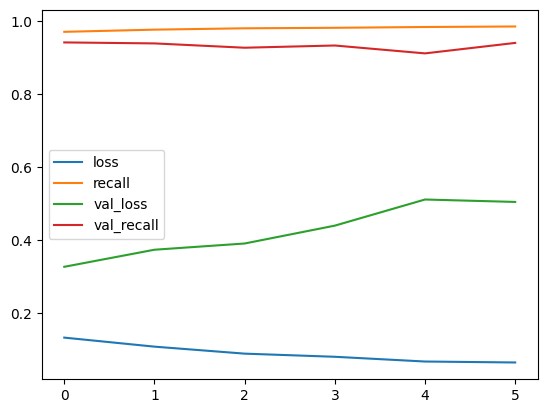

In [ ]:
DLModelLoss = pd.DataFrame(DLMode.history.history)
DLModelLoss.plot();

In [ ]:
eval_metricBL(DLMode, X_train_dl, y_train_dl, X_test_dl, y_test_dl)

142/142 [==============================] - 2s 11ms/step
train Set eval
[[ 2808   472]
 [  376 14448]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3280
           1       0.97      0.97      0.97     14824

    accuracy                           0.95     18104
   macro avg       0.93      0.92      0.92     18104
weighted avg       0.95      0.95      0.95     18104

------------------------------------------------------
test Set eval
[[ 512  308]
 [ 244 3463]]
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       820
           1       0.92      0.93      0.93      3707

    accuracy                           0.88      4527
   macro avg       0.80      0.78      0.79      4527
weighted avg       0.87      0.88      0.88      4527





```
# This is formatted as code
```

## BERT Modeling

### Read Data

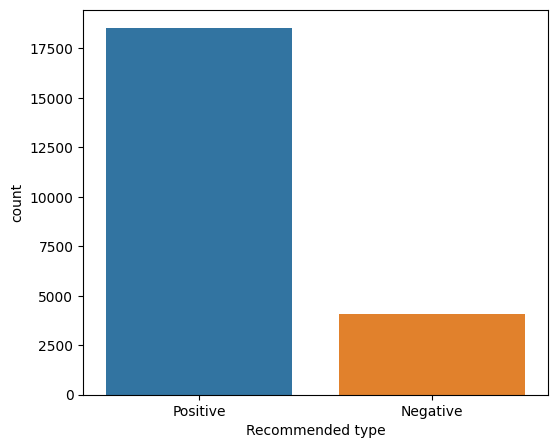

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='Recommended type',data=reviewsDataSetCleanTemp);

### Train test split

In [ ]:
XTrainBert, XTestBert, yTrainBert, yTestBert = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
XTrainVbert, XValBert, yTrainVbert, yXValBert = train_test_split(XTrainBert, yTrainBert, test_size=0.2,stratify=yTrainBert, random_state=42)

### Tokenization

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.1 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer
beTokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

### Fixing token counts of all documents

### **Done**

### Transformation Vectors to Matrices

In [ ]:
def transformatioVectorToMatricesn(Vector, tokenizer):
    Vectorids = []
    Vectormask = []
    for text in Vector:
        tokens = tokenizer.encode_plus(text, max_length=max_tokens, truncation=True,      padding='max_length', add_special_tokens=True)
        Vectorids.append(tokens['input_ids'])
        Vectormask.append(tokens['attention_mask'])
    return np.array(Vectorids), np.array(Vectormask)

In [ ]:
Xids_train_v, Xmask_train_v = transformatioVectorToMatricesn(XTrainVbert, beTokenizer)
Xids_val, Xmask_val = transformatioVectorToMatricesn(XValBert, beTokenizer)
Xids_train, Xmask_train = transformatioVectorToMatricesn(XTrainBert, beTokenizer)
Xids_test, Xmask_test = transformatioVectorToMatricesn(XTestBert, beTokenizer)

### Transformation Matrix to Tensorflow tensor

In [ ]:
datasetTrainv = tf.data.Dataset.from_tensor_slices((Xids_train_v, Xmask_train_v, yTrainVbert))
datasetVal = tf.data.Dataset.from_tensor_slices((Xids_val, Xmask_val, yXValBert))
datasetTrain = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, yTrainBert))
datasetTest = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, y_test_dl))

In [ ]:
def mapFun(ids, Xmask,labels):
      return {'input_ids': ids, 'attention_mask': Xmask}, labels


In [ ]:
datasetTrainv = datasetTrainv.map(mapFun)
datasetVal = datasetVal.map(mapFun)
datasetTrain = datasetTrain.map(mapFun)
datasetTest = datasetTest.map(mapFun)

### Batch Size

In [ ]:
batch_size = 16
trainV = datasetTrainv.batch(batch_size)
val = datasetVal.batch(batch_size)
train = datasetTrain.batch(batch_size)
test = datasetTest.batch(batch_size)

##Creating optimization

In [ ]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.7 MB/s eta 0:00:00


In [ ]:
from official.nlp import optimization
optimizer= optimization.create_optimizer(init_lr = 2e-5,num_train_steps = len(train) * 7,num_warmup_steps = int(0.1 * (len(train) * 7)),optimizer_type = 'adamw')

### Creating Model with TPU

In [145]:
!pip install tensorflow

In [147]:
strategy = tf.distribute.TPUStrategy(resolver)
from transformers import TFBertModel
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, BatchNormalization
with strategy.scope():
    model =  TFBertModel.from_pretrained("bert-base-uncased")
    input_ids = Input(shape=(58,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(58,), name='attention_mask', dtype='int32')
    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]
    x = Dense(58, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    y = Dense(1, activation='sigmoid', name='outputs')(x)
    TPUmodel = Model(inputs=[input_ids, attention_mask], outputs=y)
    TPUmodel.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = 0.003), metrics=['Recall'])


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [148]:
TPUmodel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 58)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 58)]         0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 58,                                            

### Model Fiting

In [151]:
TPUmodel.fit(trainV, epochs=15, validation_data=(val), callbacks=[early_stop])

Epoch 1/15
906/906 [==============================] - 88s 97ms/step - loss: 0.4753 - recall: 1.0000 - val_loss: 0.8264 - val_recall: 0.0000e+00
Epoch 2/15
906/906 [==============================] - 70s 77ms/step - loss: 0.4741 - recall: 1.0000 - val_loss: 0.5039 - val_recall: 1.0000
Epoch 3/15
906/906 [==============================] - 70s 77ms/step - loss: 0.4743 - recall: 1.0000 - val_loss: 0.4781 - val_recall: 1.0000
Epoch 4/15
906/906 [==============================] - 67s 74ms/step - loss: 0.4744 - recall: 1.0000 - val_loss: 0.5404 - val_recall: 1.0000
Epoch 5/15
906/906 [==============================] - 70s 77ms/step - loss: 0.4742 - recall: 1.0000 - val_loss: 0.4787 - val_recall: 1.0000
Epoch 6/15
906/906 [==============================] - 66s 73ms/step - loss: 0.4742 - recall: 1.0000 - val_loss: 1.0203 - val_recall: 0.0000e+00
Epoch 7/15
906/906 [==============================] - 76s 83ms/step - loss: 0.4742 - recall: 1.0000 - val_loss: 0.5083 - val_recall: 1.0000
Epoch 7: ear

### Model evaluation

In [152]:
eval_metricBL(TPUmodel, train, yTrainBert, test, yTestBert)

283/283 [==============================] - 6s 17ms/step
train Set eval
[[    0  3280]
 [    0 14824]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3280
           1       0.82      1.00      0.90     14824

    accuracy                           0.82     18104
   macro avg       0.41      0.50      0.45     18104
weighted avg       0.67      0.82      0.74     18104

------------------------------------------------------
test Set eval
[[   0  820]
 [   0 3707]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       820
           1       0.82      1.00      0.90      3707

    accuracy                           0.82      4527
   macro avg       0.41      0.50      0.45      4527
weighted avg       0.67      0.82      0.74      4527



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

### Compare Models F1 Scores, Recall Scores and Average Precision Score

<Axes: xlabel='all Models', ylabel='F1-Score'>

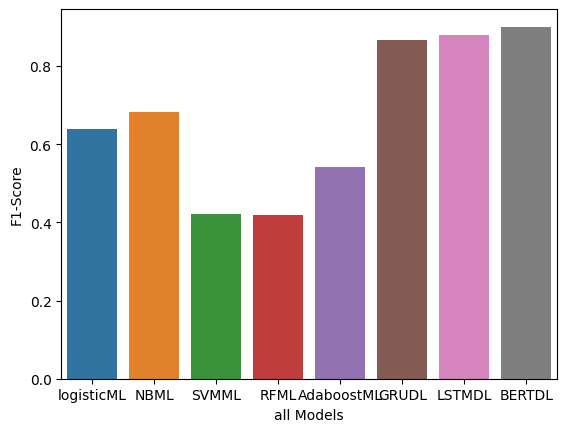

In [163]:
modelsScores = pd.DataFrame({'all Models':
                              ['logisticML', 'NBML', 'SVMML', 'RFML', 'AdaboostML' , 'GRUDL', 'LSTMDL', 'BERTDL'],
                              'F1-Score':[0.637918, 0.682225, 0.420881, 0.419436, 0.542345,0.867039, 0.879731, 0.900413	],
                              'Precision':[0.514741, 0.642721, 0.479499, 0.546724, 0.684045,0.888727, 0.902857, 0.818865],
                              'Recall':[0.840244, 0.727134, 0.626220, 0.509146, 0.449390 , 0.880274, 0.902857, 1.0]})
sns.barplot(data =modelsScores , x = 'all Models', y = 'F1-Score')

<Axes: xlabel='all Models', ylabel='Precision'>

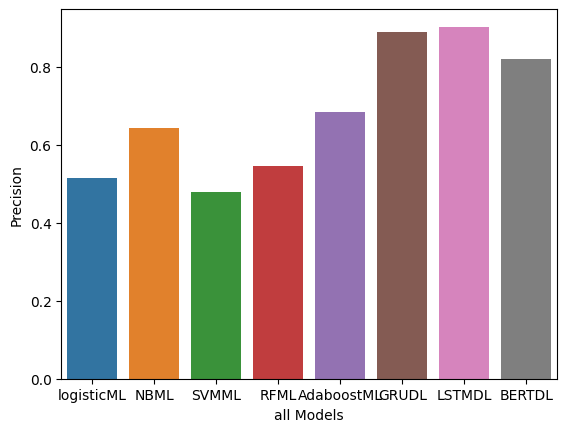

In [166]:
sns.barplot(data =modelsScores , x = 'all Models', y = 'Precision')

<Axes: xlabel='all Models', ylabel='Recall'>

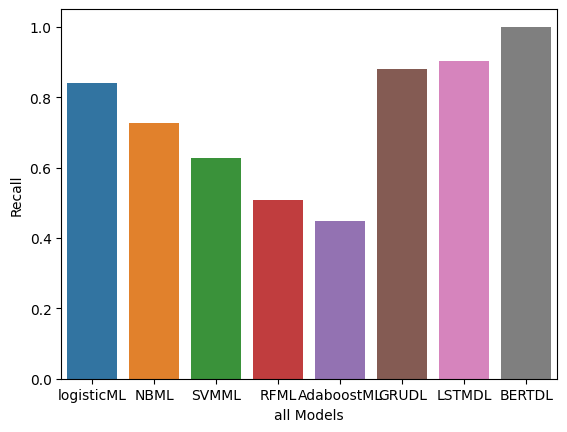

In [165]:
sns.barplot(data =modelsScores , x = 'all Models', y = 'Recall')

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___